# TensorFlow

## Load the Dataset

In [20]:
import pandas as pd

# csv_files = ['PRSA_Data_Aotizhongxin_20130301-20170228.csv', 'PRSA_Data_Changping_20130301-20170228.csv',
#              'PRSA_Data_Dingling_20130301-20170228.csv', 'PRSA_Data_Dongsi_20130301-20170228.csv',
#              'PRSA_Data_Guanyuan_20130301-20170228.csv', 'PRSA_Data_Gucheng_20130301-20170228.csv',
#              'PRSA_Data_Huairou_20130301-20170228.csv', 'PRSA_Data_Nongzhanguan_20130301-20170228.csv',
#              'PRSA_Data_Shunyi_20130301-20170228.csv', 'PRSA_Data_Tiantan_20130301-20170228.csv',
#              'PRSA_Data_Wanliu_20130301-20170228.csv', 'PRSA_Data_Wanshouxigong_20130301-20170228.csv'
#              ]

# dfs = [pd.read_csv(file) for file in csv_files]

# tensorflow_df = pd.concat(dfs)

tensorflow_df = pd.read_csv('PRSA_Data_Dongsi_20130301-20170228.csv')

tensorflow_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
2,3,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi
3,4,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi


## Clean the Data & Check Missing Values

In [21]:
tensorflow_df.isnull().sum(axis = 0)

No            0
year          0
month         0
day           0
hour          0
PM2.5       750
PM10        553
SO2         663
NO2        1601
CO         3197
O3          664
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

In [22]:
tensorflow_df = tensorflow_df.dropna(axis = 0)

tensorflow_df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
5,6,2013,3,1,5,4.0,4.0,9.0,25.0,300.0,78.0,-2.4,1027.5,-21.3,0.0,NW,2.4,Dongsi
6,7,2013,3,1,6,5.0,5.0,10.0,29.0,400.0,67.0,-2.5,1028.2,-20.4,0.0,NW,2.2,Dongsi
7,8,2013,3,1,7,3.0,6.0,12.0,40.0,400.0,52.0,-1.4,1029.5,-20.4,0.0,NNW,3.0,Dongsi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,16.0,51.0,3.0,29.0,400.0,73.0,12.5,1013.5,-16.2,0.0,NW,2.4,Dongsi
35060,35061,2017,2,28,20,18.0,45.0,3.0,43.0,500.0,54.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Dongsi
35061,35062,2017,2,28,21,23.0,58.0,5.0,61.0,700.0,28.0,10.8,1014.2,-13.3,0.0,NW,1.1,Dongsi
35062,35063,2017,2,28,22,23.0,53.0,9.0,75.0,900.0,15.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Dongsi


## Convert Categorical Variables to Numerical Values

In [23]:
tensorflow_df['wd'] = tensorflow_df['wd'].astype('category')

print(tensorflow_df.dtypes)

tensorflow_df['wd'] = tensorflow_df['wd'].cat.codes

tensorflow_df['wd'].unique()

No            int64
year          int64
month         int64
day           int64
hour          int64
PM2.5       float64
PM10        float64
SO2         float64
NO2         float64
CO          float64
O3          float64
TEMP        float64
PRES        float64
DEWP        float64
RAIN        float64
wd         category
WSPM        float64
station      object
dtype: object


array([ 6,  7,  3, 13,  1,  4,  0,  5, 12, 11,  8, 15,  2,  9, 14, 10],
      dtype=int8)

In [24]:
catFeatures = ['station']

factors = pd.get_dummies(tensorflow_df[catFeatures], drop_first = True)

factors.head()

""
0
1
5
6
7


In [25]:
tensorflow_df = tensorflow_df.drop(catFeatures, axis = 1)

tensorflow_df = pd.concat([tensorflow_df, factors], axis = 1)

tensorflow_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,6,5.7
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,7,3.9
5,6,2013,3,1,5,4.0,4.0,9.0,25.0,300.0,78.0,-2.4,1027.5,-21.3,0.0,7,2.4
6,7,2013,3,1,6,5.0,5.0,10.0,29.0,400.0,67.0,-2.5,1028.2,-20.4,0.0,7,2.2
7,8,2013,3,1,7,3.0,6.0,12.0,40.0,400.0,52.0,-1.4,1029.5,-20.4,0.0,6,3.0


## Split 80-20 into Train Data & Test Data

In [26]:
X = tensorflow_df.drop(['wd'], axis = 1)

y = tensorflow_df['wd']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

print(f"X Train Shape: {X_train.shape} \nX Test Shape: {X_test.shape}")
print(f"y Train Shape: {y_train.shape} \ny Test Shape: {y_test.shape}")

X Train Shape: (24270, 16) 
X Test Shape: (6068, 16)
y Train Shape: (24270,) 
y Test Shape: (6068,)


## Preprocess the Data using the Normalization Method to Convert All Features into the Range of [0,1]

In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0, 1))

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

## Build a Neuron Network w/ Two Hidden Layers

In [28]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

tensorflow_model = keras.Sequential()

# First Hidden Layer w/ 20 Neurons
tensorflow_model.add(layers.Dense(20, activation = 'relu'))

# Second Hidden Layer w/ 10 Neurons
tensorflow_model.add(layers.Dense(10, activation = 'relu'))

# Output Layer Has One & Only One Neuron
tensorflow_model.add(layers.Dense(units = len(tensorflow_df['wd'].unique()), activation = 'softmax'))

# Configure the Model by Choosing Optimizer & Loss Function
tensorflow_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [29]:
%%time

# Fix the seed
tf.random.set_seed(1)

# Fit the model & Save the Results in History
history = tensorflow_model.fit(x = X_train, y = y_train, batch_size = 64, epochs = 100, validation_data = (X_test, y_test), verbose = 1)

Epoch 1/100
380/380 [==============================] - 2s 3ms/step - loss: 2.6930 - accuracy: 0.1067 - val_loss: 2.6276 - val_accuracy: 0.1272
Epoch 2/100
380/380 [==============================] - 1s 2ms/step - loss: 2.5837 - accuracy: 0.1493 - val_loss: 2.5617 - val_accuracy: 0.1674
Epoch 3/100
380/380 [==============================] - 1s 2ms/step - loss: 2.5206 - accuracy: 0.1765 - val_loss: 2.5012 - val_accuracy: 0.1857
Epoch 4/100
380/380 [==============================] - 1s 3ms/step - loss: 2.4729 - accuracy: 0.1847 - val_loss: 2.4625 - val_accuracy: 0.1890
Epoch 5/100
380/380 [==============================] - 1s 4ms/step - loss: 2.4409 - accuracy: 0.1895 - val_loss: 2.4341 - val_accuracy: 0.1941
Epoch 6/100
380/380 [==============================] - 1s 3ms/step - loss: 2.4183 - accuracy: 0.1948 - val_loss: 2.4189 - val_accuracy: 0.1964
Epoch 7/100
380/380 [==============================] - 1s 3ms/step - loss: 2.4039 - accuracy: 0.1944 - val_loss: 2.4034 - val_accuracy: 0.2002

In [30]:
# Convert the Train & Validation Loss to a DF
trainhist = pd.DataFrame(history.history)

# Add the epoch index
trainhist['epoch'] = history.epoch

# Look at the latest performance
trainhist.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
95,2.269856,0.227029,2.292389,0.219677,95
96,2.269332,0.226205,2.291378,0.216546,96
97,2.269812,0.226906,2.293106,0.215722,97
98,2.267943,0.228101,2.293355,0.212261,98
99,2.270073,0.226576,2.290896,0.220336,99


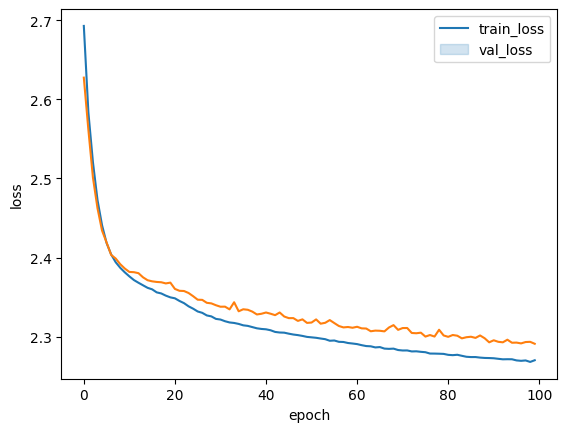

In [31]:
from matplotlib import pyplot as plt
import seaborn as sns

# Plot Train Loss
sns.lineplot(x = 'epoch', y = 'loss', data = trainhist)

# Plot Validation Loss
sns.lineplot(x = 'epoch', y = 'val_loss', data = trainhist)

# Add Legends
plt.legend(labels = ['train_loss', 'val_loss'])

#### This is a underfitting data because of the following reason(s):
####  1. Training Loss steadily decrease with negative slope.

####  2. Validation Loss steadily decrease with a positive slope.

####  3. There are noises in the loss function, especially in the
####     Validation Loss.

## Hyperparameter Tuning using Keras-Tuner

In [32]:
import sys
# Check the Existence of the Keras-Tuner Library
if('keras-tuner' not in sys.modules):
  # If it was not installed, then install it
  !pip install -q -U keras-tuner

# Import the library of keras-tuner
  import keras_tuner as kt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 2.2 MB/s eta 0:00:00


In [33]:
%%time
from tensorflow.python.ops.gen_nn_ops import softmax
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.constraints import max_norm
def model_builder(hp):
  model = keras.Sequential()

  # Search the # of Neurons from 20-100 w/ a stepsize of 5 in the First Hidden Layer
  hp_units1 = hp.Int('units1', min_value = 20, max_value = 100, step = 5)
  model.add(Dense(units = hp_units1, activation = 'relu'))

  # Tune the Dropout Rate in the First Hidden Layer
  # Search the Dropout Rate in the First Hidden Layer in the Range of .2--.8 w/ a StepSize of .1
  hp_dropout1 = hp.Float('rate1', min_value = .2, max_value = .8, step = .1)
  model.add(Dropout(rate = hp_dropout1))

  # Search the # of Neurons from 10-50 w/ a stepsize of 2 in the Second Hidden Layer
  hp_units2 = hp.Int('units2', min_value = 10, max_value = 50, step = 2)
  model.add(Dense(units = hp_units2, activation = 'relu'))

  # Tune the Dropout Rate in the Second Hidden Layer
  # Search the Dropout Rate in the Second Hidden Layer in the Range of .2--.8 w/ a StepSize of .1
  hp_dropout2 = hp.Float('rate2', min_value = .2, max_value = .8, step = .1)
  model.add(Dropout(rate = hp_dropout2))

  # Output Layer Has 16 Neuron
  model.add(Dense(16, activation = 'softmax'))

  # Tune the Learning Rate for the Optimizer
  # Search the Learning Rate from .01, .001, or .0001
  hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4])

  model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = hp_learning_rate),
                loss = 'sparse_categorical_crossentropy',
                metrics = ['accuracy']
                )
  return model

CPU times: user 353 µs, sys: 1.03 ms, total: 1.38 ms
Wall time: 4.16 ms


In [34]:
tuner = kt.Hyperband(model_builder, # Specify the model
                     objective = 'val_loss', # Specify the objective function
                     max_epochs = 100, # Specify the maximum epochs
                     directory = 'my_dir', # Specify the file path
                     project_name = 'tuningRegression'
                     )

In [35]:
import IPython

# Clear All the Training Outputs
class ClearTrainingOutput(tf.keras.callbacks.Callback):
  def on_train_end(*args, **kwargs):
    IPython.display.clear_output(wait = True)

In [36]:
# Perform the Search on the Defined Hyperparameter Space by Specifying the Callback to Clear the Training Outputs
tuner.search(X_train, y_train, epochs = 100, validation_data = (X_test, y_test), callbacks = [ClearTrainingOutput()])

Trial 254 Complete [00h 04m 24s]
val_loss: 2.4007062911987305

Best val_loss So Far: 2.223534107208252
Total elapsed time: 01h 56m 22s


In [37]:
# Get the Optimal Hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]

# Use F-Strings to Format the Outputs
print(f"""
The Optimal # of Units in the First Hidden Layer = {best_hps.get('units1')}.
The Optimal # of Units in the Second Hidden Layer = {best_hps.get('units2')}
The Optimal Dropout Rate in the First Hidden Layer = {best_hps.get('rate1')}.
The Optimal Dropout Rate in the Second Hidden Layer = {best_hps.get('rate2')}.
The Optimal Learning Rate for the Optimizer of Adam = {best_hps.get('learning_rate')}.
""")


The Optimal # of Units in the First Hidden Layer = 80.
The Optimal # of Units in the Second Hidden Layer = 14
The Optimal Dropout Rate in the First Hidden Layer = 0.2.
The Optimal Dropout Rate in the Second Hidden Layer = 0.2.
The Optimal Learning Rate for the Optimizer of Adam = 0.001.



In [38]:
# Build the Model w/ the Optimal Hyperparameters & Train it on the Data
model = tuner.hypermodel.build(best_hps)
model.fit(X_train, y_train, epochs = 100, validation_data = (X_test, y_test))

Epoch 1/100
759/759 [==============================] - 7s 7ms/step - loss: 2.6336 - accuracy: 0.1372 - val_loss: 2.5235 - val_accuracy: 0.1788
Epoch 2/100
759/759 [==============================] - 5s 7ms/step - loss: 2.5171 - accuracy: 0.1712 - val_loss: 2.4721 - val_accuracy: 0.1841
Epoch 3/100
759/759 [==============================] - 5s 7ms/step - loss: 2.4715 - accuracy: 0.1782 - val_loss: 2.4266 - val_accuracy: 0.1875
Epoch 4/100
759/759 [==============================] - 5s 6ms/step - loss: 2.4441 - accuracy: 0.1834 - val_loss: 2.4014 - val_accuracy: 0.1948
Epoch 5/100
759/759 [==============================] - 5s 6ms/step - loss: 2.4215 - accuracy: 0.1903 - val_loss: 2.3824 - val_accuracy: 0.2032
Epoch 6/100
759/759 [==============================] - 4s 5ms/step - loss: 2.4096 - accuracy: 0.1929 - val_loss: 2.3852 - val_accuracy: 0.1978
Epoch 7/100
759/759 [==============================] - 4s 6ms/step - loss: 2.3931 - accuracy: 0.1989 - val_loss: 2.3669 - val_accuracy: 0.1989

In [39]:
def model_create():
  model = keras.Sequential()

  # First Hidden Layer w/ Optimal Neurons
  model.add(layers.Dense(best_hps.get('units1'), activation = 'relu'))

  # Add Optimal Droput Rate
  model.add(Dropout(best_hps.get('rate1')))

  # Second Hidden Layer w/ Optimal Neurons
  model.add(layers.Dense(best_hps.get('units2'), activation = 'relu'))

  # Add Optimal Dropout Rate
  model.add(Dropout(best_hps.get('rate2')))

  # Output Layer Has 16 Neuron
  model.add(layers.Dense(16, activation = 'softmax'))

  # Set the Optimal Learning Rate Found by the Tuner
  model.compile(optimizer = keras.optimizers.Adam(learning_rate = best_hps.get('learning_rate')),
                loss = 'sparse_categorical_crossentropy',
                metrics = ['accuracy'])

  return model

# Create the model
model = model_create()

In [40]:
# Specify the Directory to Save the Weights
import os
cp_path = 'training/cp.regr'
cp_dir = os.path.dirname(cp_path)

# Create a Callback to Save the Model's Weights
# We Only Save the Best Weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath = cp_path, save_best_only = True,
                                                 save_weights_only = True,
                                                 verbose = 1)

# Train the Model & Specify the Defined Callback Using Callback=[]
model.fit(X_train, y_train, epochs = 100, validation_data = (X_test, y_test), callbacks = [cp_callback])

Epoch 1/100
753/759 [============================>.] - ETA: 0s - loss: 2.6694 - accuracy: 0.1231
Epoch 1: val_loss improved from inf to 2.57384, saving model to training/cp.regr
759/759 [==============================] - 3s 4ms/step - loss: 2.6693 - accuracy: 0.1233 - val_loss: 2.5738 - val_accuracy: 0.1676
Epoch 2/100
755/759 [============================>.] - ETA: 0s - loss: 2.5377 - accuracy: 0.1672
Epoch 2: val_loss improved from 2.57384 to 2.47346, saving model to training/cp.regr
759/759 [==============================] - 3s 4ms/step - loss: 2.5383 - accuracy: 0.1670 - val_loss: 2.4735 - val_accuracy: 0.1857
Epoch 3/100
758/759 [============================>.] - ETA: 0s - loss: 2.4784 - accuracy: 0.1777
Epoch 3: val_loss improved from 2.47346 to 2.42790, saving model to training/cp.regr
759/759 [==============================] - 2s 2ms/step - loss: 2.4785 - accuracy: 0.1777 - val_loss: 2.4279 - val_accuracy: 0.1915
Epoch 4/100
753/759 [============================>.] - ETA: 0s - 

In [41]:
# First, Create the Model
model = model_create()

# Second, Load the Weights
model.load_weights(cp_path)

# Third, Evaluate the Model on the New Dataset
loss = model.evaluate(X_test, y_test, verbose = 2)

print(f"Reload model form file with loss: {loss[1]}.")

190/190 - 1s - loss: 2.2283 - accuracy: 0.2284 - 716ms/epoch - 4ms/step
Reload model form file with loss: 0.22841133177280426.


In [42]:
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np

predictions = np.argmax(model.predict(X_test), axis = 1)

print(confusion_matrix(y_test, predictions))

print(classification_report(y_test, predictions))

190/190 [==============================] - 0s 2ms/step
[[273 162  65   1  77   1   1  11   8   1   0  17  13   0   0   0]
 [207 215  31   4 112   1   1  37   2   1   0   9  14   0   0   2]
 [166  88  75   0  46   0   0   6   8   3   0  35  31   0   0   2]
 [ 66  58  17   5  66   1   8  87   1   0   0   4   4   0   0   3]
 [129 187  16   7 207   1   3  37   3   1   0   8  20   0   0   0]
 [ 83  83   9   4  92   2   3  34   1   0   0   4   7   0   0   0]
 [ 41  23  11   6  33   0   8 149   1   1   0   8   5   0   0   4]
 [ 27  29  10   4  40   1   2 285   0   0   0  10  19   0   0   0]
 [ 69   5  34   0  16   0   0   1   6   4   0  88  45   0   0   4]
 [109  27  56   0  41   0   0   1   6   4   0  47  32   0   0   1]
 [ 83  15  30   0  10   0   0   0   9   5   0  65  35   0   0   2]
 [ 56  12  39   1  11   0   0   8   3   1   0  89  97   0   0   2]
 [ 46   7  40   1  48   0   0  21   4   3   0  72 195   0   0   8]
 [ 48  12  14   0  25   0   0   8   5   0   0   8  28   1   0  12]
 [ 47  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# PyTorch

## Load the Dataset

In [62]:
import pandas as pd

# csv_files = ['PRSA_Data_Aotizhongxin_20130301-20170228.csv', 'PRSA_Data_Changping_20130301-20170228.csv',
#              'PRSA_Data_Dingling_20130301-20170228.csv', 'PRSA_Data_Dongsi_20130301-20170228.csv',
#              'PRSA_Data_Guanyuan_20130301-20170228.csv', 'PRSA_Data_Gucheng_20130301-20170228.csv',
#              'PRSA_Data_Huairou_20130301-20170228.csv', 'PRSA_Data_Nongzhanguan_20130301-20170228.csv',
#              'PRSA_Data_Shunyi_20130301-20170228.csv', 'PRSA_Data_Tiantan_20130301-20170228.csv',
#              'PRSA_Data_Wanliu_20130301-20170228.csv', 'PRSA_Data_Wanshouxigong_20130301-20170228.csv'
#              ]

# dfs = [pd.read_csv(file) for file in csv_files]

# pytorch_df = pd.concat(dfs)

pytorch_df = pd.read_csv('PRSA_Data_Dongsi_20130301-20170228.csv')

pytorch_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
2,3,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi
3,4,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi


## Clean the Dataset & Check Missing Values

In [63]:
pytorch_df.isnull().sum(axis = 0)

No            0
year          0
month         0
day           0
hour          0
PM2.5       750
PM10        553
SO2         663
NO2        1601
CO         3197
O3          664
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

In [64]:
pytorch_df = pytorch_df.dropna(axis = 0)

pytorch_df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
5,6,2013,3,1,5,4.0,4.0,9.0,25.0,300.0,78.0,-2.4,1027.5,-21.3,0.0,NW,2.4,Dongsi
6,7,2013,3,1,6,5.0,5.0,10.0,29.0,400.0,67.0,-2.5,1028.2,-20.4,0.0,NW,2.2,Dongsi
7,8,2013,3,1,7,3.0,6.0,12.0,40.0,400.0,52.0,-1.4,1029.5,-20.4,0.0,NNW,3.0,Dongsi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,16.0,51.0,3.0,29.0,400.0,73.0,12.5,1013.5,-16.2,0.0,NW,2.4,Dongsi
35060,35061,2017,2,28,20,18.0,45.0,3.0,43.0,500.0,54.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Dongsi
35061,35062,2017,2,28,21,23.0,58.0,5.0,61.0,700.0,28.0,10.8,1014.2,-13.3,0.0,NW,1.1,Dongsi
35062,35063,2017,2,28,22,23.0,53.0,9.0,75.0,900.0,15.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Dongsi


## Convert Categorical Variables into Numerical Values

In [65]:
pytorch_df['wd'] = pytorch_df['wd'].astype('category')

print(pytorch_df.dtypes)

pytorch_df['wd'] = pytorch_df['wd'].cat.codes

pytorch_df['wd'].unique()

No            int64
year          int64
month         int64
day           int64
hour          int64
PM2.5       float64
PM10        float64
SO2         float64
NO2         float64
CO          float64
O3          float64
TEMP        float64
PRES        float64
DEWP        float64
RAIN        float64
wd         category
WSPM        float64
station      object
dtype: object


array([ 6,  7,  3, 13,  1,  4,  0,  5, 12, 11,  8, 15,  2,  9, 14, 10],
      dtype=int8)

In [66]:
catFeatures = ['station']

factors = pd.get_dummies(pytorch_df[catFeatures], drop_first = True)

factors.head()

""
0
1
5
6
7


In [67]:
pytorch_df = pytorch_df.drop(catFeatures, axis = 1)

pytorch_df = pd.concat([pytorch_df, factors], axis = 1)

pytorch_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,6,5.7
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,7,3.9
5,6,2013,3,1,5,4.0,4.0,9.0,25.0,300.0,78.0,-2.4,1027.5,-21.3,0.0,7,2.4
6,7,2013,3,1,6,5.0,5.0,10.0,29.0,400.0,67.0,-2.5,1028.2,-20.4,0.0,7,2.2
7,8,2013,3,1,7,3.0,6.0,12.0,40.0,400.0,52.0,-1.4,1029.5,-20.4,0.0,6,3.0


## Split 80-20 into Train Data & Test Data

In [68]:
X = pytorch_df.drop(['wd'], axis = 1)

y = pytorch_df['wd']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

print(f"X Train Shape: {X_train.shape} \nX Test Shape: {X_test.shape}")
print(f"y Train Shape: {y_train.shape} \ny Test Shape: {y_test.shape}")

X Train Shape: (24270, 16) 
X Test Shape: (6068, 16)
y Train Shape: (24270,) 
y Test Shape: (6068,)


## Preprocess the Data using the Normalization Method to Convert All Features into the Range of [0, 1]

In [69]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

## Build a Neuron Network w/ Two Hidden Layers

In [71]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

X_train = torch.tensor(X_train.astype(np.float32))
y_train = torch.tensor(y_train.values.astype(np.int64))#.reshape(-1,1))

X_test = torch.from_numpy(X_test.astype(np.float32))
y_test = torch.tensor(y_test.values.astype(np.int64))


print(f"X Train Shape: {X_train.shape} \nX Test Shape: {X_test.shape}")
print(f"y Train Shape: {y_train.shape} \ny Test Shape: {y_test.shape}")

X Train Shape: torch.Size([24270, 16]) 
X Test Shape: torch.Size([6068, 16])
y Train Shape: torch.Size([24270]) 
y Test Shape: torch.Size([6068])


In [75]:
input_size = X_train.shape[1]
output_size = len(pytorch_df['wd'].unique())

# Specify the # of Neuron for the First Layer
hidden_size = [20, 10]

print(input_size)
print(output_size)

16
16


In [76]:
# Define the Child Module Class Derivated from Parent Class of torch.nn.Module
class LinearClassificationModel(torch.nn.Module):
  # Define the Constructor
  def __init__(self, input_size, hidden_size, output_size, droprate):
    super(LinearClassificationModel, self).__init__()
    self.hidden1 = torch.nn.Linear(input_size, hidden_size[0])
    self.hidden1_drop = nn.Dropout(droprate)
    self.hidden2 = torch.nn.Linear(hidden_size[0], hidden_size[1])
    self.hidden2_drop = nn.Dropout(droprate)
    self.predict = torch.nn.Linear(hidden_size[1], output_size)

  # Overwrite the Forward Function in this Child Class
  def forward(self, x):
    x = F.relu(self.hidden1(x))
    x = F.relu(self.hidden1_drop(x))
    x = F.relu(self.hidden2(x))
    x = F.relu(self.hidden2_drop(x))
    y_pred = self.predict(x)

    return y_pred

In [77]:
droprate = .2

model = LinearClassificationModel(input_size, hidden_size, output_size, droprate)

l = nn.CrossEntropyLoss()

In [78]:
optimizer = torch.optim.Adam(model.parameters(), lr = .05)

In [79]:
%%time
import torch
# Fix the Random Seeds for torch & np
torch.manual_seed(1)
np.random.seed(0)

# Set the # of Epochs
num_epochs = 1000

train_loss = [None]*num_epochs
validation_loss = [None]*num_epochs

for epoch in range(num_epochs):
  # Forward Pass
  output = model(X_train)

  # Calculate the Loss
  loss = l(output, y_train)
  train_loss[epoch] = loss.item()

  # Set the Gradients to be Zero
  optimizer.zero_grad()

  # Backward Pass: Calculate Gradients
  loss.backward()

  # Update the Weights
  optimizer.step()

  # Stop Tracking the Gradients by Calling Detach since we don't use it anymore
  y_pred = model(X_test)#.detach().numpy()
  val_loss = l(y_pred, y_test)
  validation_loss[epoch] = val_loss.item()
  if epoch % 100 == 0:
    print(f'epoch {epoch}, loss = {loss.item()} and val_loss = {val_loss}')

epoch 0, loss = 2.818474054336548 and val_loss = 2.7560389041900635
epoch 100, loss = 2.4318196773529053 and val_loss = 2.4423770904541016
epoch 200, loss = 2.4081385135650635 and val_loss = 2.4227585792541504
epoch 300, loss = 2.3985869884490967 and val_loss = 2.419957160949707
epoch 400, loss = 2.3901686668395996 and val_loss = 2.4086623191833496
epoch 500, loss = 2.3913800716400146 and val_loss = 2.4037909507751465
epoch 600, loss = 2.3888354301452637 and val_loss = 2.4024670124053955
epoch 700, loss = 2.389448404312134 and val_loss = 2.402820348739624
epoch 800, loss = 2.391404390335083 and val_loss = 2.4043385982513428
epoch 900, loss = 2.3822169303894043 and val_loss = 2.4095025062561035
CPU times: user 19.5 s, sys: 142 ms, total: 19.7 s
Wall time: 20.2 s


In [80]:
# Convert the Train & Validation Loss to a DF
trainhist = pd.DataFrame({'train_loss': train_loss, 'val_loss': validation_loss, 'epoch': np.arange(num_epochs)})

# Look at the Latest Performance
trainhist.tail()

,train_loss,val_loss,epoch
995,2.388408,2.400751,995
996,2.389016,2.408959,996
997,2.388680,2.404777,997
998,2.387216,2.403857,998
999,2.389842,2.403442,999


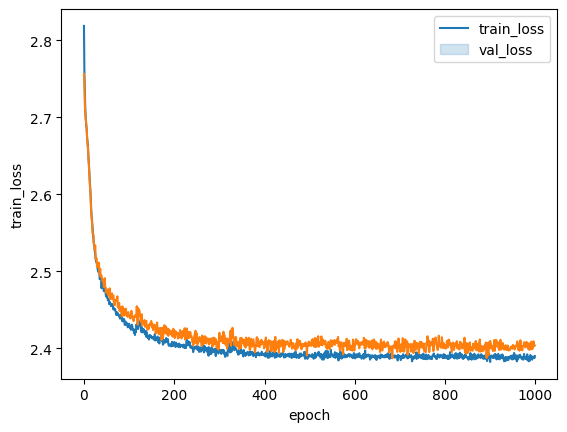

In [82]:
from matplotlib import pyplot as plt
import seaborn as sns

# Plot Train Loss
sns.lineplot(x = 'epoch', y = 'train_loss', data = trainhist)

# Plot Validation Loss
sns.lineplot(x = 'epoch', y = 'val_loss', data = trainhist)

# Add Legends
plt.legend(labels = ['train_loss', 'val_loss'])

#### This is a underfitting data because of the following reason(s):
####  1. Training Loss steadily decrease with negative slope.

####  2. Validation Loss steadily decrease with a positive slope.

####  3. There are noises in the loss function, especially in the
####     Validation Loss.

In [83]:
from sklearn.metrics import classification_report, confusion_matrix

predictions = model(X_test).detach().numpy()

print(confusion_matrix(y_test, np.argmax(predictions, axis = 1)))

print(classification_report(y_test, np.argmax(predictions, axis = 1)))

[[223 247  21   0  69   0   0  20   0   0   0  21  29   0   0   0]
 [170 255  22   0 111   0   0  37   0   0   0  14  27   0   0   0]
 [143 159  27   0  34   0   0  11   0   0   0  33  53   0   0   0]
 [ 73  80   4   0  51   0   2  83   0   0   0  10  17   0   0   0]
 [142 262   5   0 133   0   2  45   0   0   0  12  18   0   0   0]
 [ 77 125   5   0  66   0   0  32   0   0   0   3  14   0   0   0]
 [ 46  48   4   0  21   0   2 139   0   0   0   8  22   0   0   0]
 [ 29  50   4   0  48   0   4 255   0   0   0  12  25   0   0   0]
 [ 89  28  11   0   9   0   0   0   0   0   0  76  59   0   0   0]
 [104  72  24   0  23   0   0   3   0   0   0  48  50   0   0   0]
 [ 81  38  16   0   5   0   0   2   0   0   0  60  52   0   0   0]
 [ 78  38  17   0   8   0   0  11   0   0   0  58 109   0   0   0]
 [ 85  64  10   0  18   0   0  30   0   0   0  56 182   0   0   0]
 [ 49  35   4   0  13   0   0  12   0   0   0  23  25   0   0   0]
 [ 40  45   1   0  26   0   1 114   0   0   0  11  18   0   0 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
